# Label Aggregation Examples

In this notebook, we will examine 4 different applications of SALT using label aggregation methods.

In [1]:
from py_salt import event_mapping
from pprint import pprint as pp

In [2]:
# Init EventExplorer class
e = event_mapping.EventExplorer()

## Example 1: Find dataset labels for a standard label of interest

In this example we demonstrate how easy it is to gather labels of specific interest from all the mapped datasets. Let's examine a very fine sound event first: A car horn.

In [3]:
# example for a fine label
dataset_label = 'car_horn'

print(f'Dataset labels for standard label: "{dataset_label}"\n')
pp(e.get_mapping_for_std_label(dataset_label))

Dataset labels for standard label: "car_horn"

{'AudioSet': ['Toot', 'Vehicle horn, car horn, honking'],
 'AudioSet_strong': ['Toot', 'Vehicle horn, car horn, honking, toot'],
 'ESC50': ['car_horn'],
 'Fsd50k': ['Vehicle_horn_and_car_horn_and_honking'],
 'MAESTROsynthetic': ['car_horn'],
 'SONYC': ['car-horn'],
 'Singapura': ['Car horn'],
 'UrbanSound8K': ['car horn']}


This utility works for coarse labels as well, allowing the user to gather all labels for a domain of interest from different datasets. Let's say we want to gather data (access to labels) for domestic sound events.

In [4]:
dataset_label = 'domestic_sounds'
print(f'Dataset labels for standard label: "{dataset_label}"\n')

# example for a coarse label
pp(e.get_mapping_for_std_label(std_label=dataset_label))

Dataset labels for standard label: "domestic_sounds"

{'AudioSet': ['Alarm clock',
              'Bathtub (filling or washing)',
              'Blender',
              'Chopping (food)',
              'Coin (dropping)',
              'Computer keyboard',
              'Cupboard open or close',
              'Cutlery, silverware',
              'Ding-dong',
              'Dishes, pots, and pans',
              'Domestic sounds, home sounds',
              'Door',
              'Doorbell',
              'Drawer open or close',
              'Electric shaver, electric razor',
              'Electric toothbrush',
              'Frying (food)',
              'Hair dryer',
              'Kettle whistle',
              'Keys jangling',
              'Microwave oven',
              'Packing tape, duct tape',
              'Radio',
              'Scissors',
              'Shuffling cards',
              'Sink (filling or washing)',
              'Slam',
              'Sliding door',
           

## Example 2: Find dataset labels for a dataset label of interest

Let's suppose we are working with data from AudioSet, and we are particularly interested in gathering more data that are associated with the label "Howl (wind)". Below, we demonstrate how we can achieve this, using a simple function:

In [5]:
e.reset_map_df()

# Start with a dataset label, e.g. AudioSet's "Howl (wind)"
dataset_label = 'Howl (wind)'

# Get the mapping dictionary
mapping_dict, std_label = e.get_mapping_for_dataset_label(
  dataset_label=dataset_label, return_std_label=True)

print(f'Standard label for "{dataset_label}": "{std_label}"\n')
print('Associated labels from external datasets:\n')
pp(mapping_dict)

Standard label for "Howl (wind)": "wind_blowing"

Associated labels from external datasets:

{'Archeo': ['wind'],
 'AudioSet': ['Wind',
              'Wind noise (microphone)',
              'Howl (wind)',
              'Rustling leaves'],
 'AudioSet_strong': ['Wind',
                     'Wind noise (microphone)',
                     'Howl (wind)',
                     'Rustling leaves'],
 'ESC50': ['wind'],
 'Fsd50k': ['Wind'],
 'MAESTROreal': ['wind_blowing'],
 'Singapura': ['Wind'],
 'TUTSoundEvents2016': ['wind blowing']}


## Example 3: Find a domain of interest from a dataset label

In this example, we demonstrate how we can gather data for a whole label "domain" starting from a very fine dataset label. Let's suppose we are working with the label "Hose pump" from SINGA:PURA...

First, let's find the standard label that "Hose pump" is mapped to:

In [6]:
dataset_label = 'Hose pump'

e.get_std_label_from_dataset_label(dataset_label)

'hose_pump'

Expectedly, it's simply the same label using the "Audible" naming convention. Next, let's find the label paths from coarse to fine labels for "hose_pump":

In [7]:
e.get_paths_to_label('hose_pump')

[['sound_of_things', 'liquid', 'hose_pump']]

Interesting! Let's find out what else lies under "liquid"

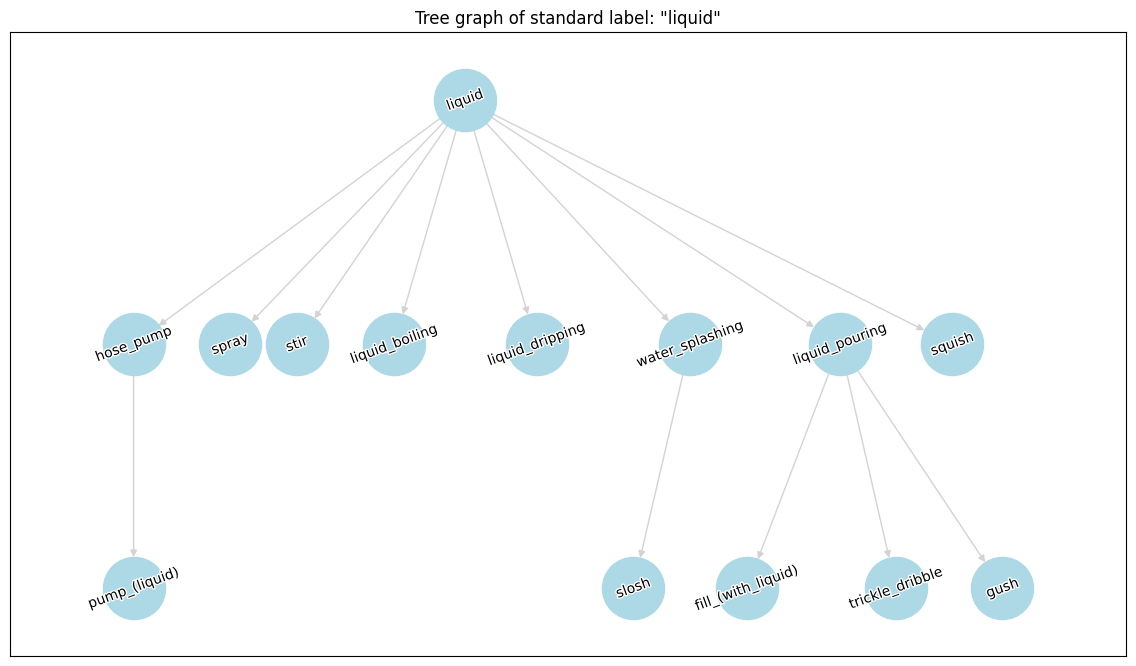

In [8]:
e.plot_hierarchical_tree_graph('liquid')

Finally, let's get all the dataset labels associated with "liquid":

In [9]:
domain_labels = e.get_mapping_for_std_label('liquid')
pp(domain_labels)

{'AudioSet': ['Boiling',
              'Drip',
              'Fill (with liquid)',
              'Gush',
              'Liquid',
              'Pour',
              'Pump (liquid)',
              'Slosh',
              'Splash, splatter',
              'Spray',
              'Squish',
              'Stir',
              'Trickle, dribble'],
 'AudioSet_strong': ['Boiling',
                     'Drip',
                     'Fill (with liquid)',
                     'Gush',
                     'Liquid',
                     'Pour',
                     'Pump (liquid)',
                     'Slosh',
                     'Splash, splatter',
                     'Spray',
                     'Squish',
                     'Stir',
                     'Trickle, dribble'],
 'Fsd50k': ['Boiling',
            'Drip',
            'Fill_(with_liquid)',
            'Liquid',
            'Pour',
            'Splash_and_splatter',
            'Trickle_and_dribble'],
 'Singapura': ['Hose pump']}


This is how we moved from a simple label (Hose pump), to a whole domain of labels of the same category (liquid)!

## Example 4: Find common labels across different datasets

In this example, we demonstrate how we can gather the common set of standard labels across different datasets

In [10]:
e.get_mapped_datasets()

['Fsd50k',
 'AudioSet_strong',
 'AudioSet',
 'ESC50',
 'Singapura',
 'MAESTROreal',
 'TUTSoundEvents2017',
 'Urbansas',
 'MAVDtraffic',
 'IDMTtraffic',
 'UrbanSound8K',
 'TUTSoundEvents2016',
 'MAESTROsynthetic',
 'SONYC',
 'Archeo',
 'NoisenseDB',
 'TAUNIGENSSpatialSoundEvents2020',
 'Nigens',
 'TUTRareSoundEvents',
 'CHiMEHome',
 'ReaLISED',
 'DESEDReal',
 'Starss22',
 'Starss23',
 'MATS',
 'Nonspeech7k',
 'AnimalSound']

Let's choose ReaLISED, MATS & CHiMEHome

In [11]:
datasets = ['ReaLISED', 'MATS', 'CHiMEHome']
e.find_datasets_intersection(datasets)

['human_sounds',
 'talking',
 'human_voice',
 'sound_of_things',
 'speech',
 'channel_environment_and_background']

Another example using Starss22, ESC50, AudioSet & UrbanSound8K. This time, we will also gather the dataset labels for each one of the selected datasets.

In [12]:
datasets = ['Starss22', 'ESC50', 'AudioSet', 'UrbanSound8K']

# Find the common set of standard labels
std_labels = e.find_datasets_intersection(datasets)

print('Standard labels:')
print(std_labels)
print()

# Filter the mapping dataframe through the selected datasets
e.filter_by_datasets(datasets)

# Get dataset labels for each one of the standard labels
dataset_labels = {}
for std_label in std_labels:
  dataset_labels.update(e.get_mapping_for_std_label(std_label))

print('Number of dataset labels per dataset:')
for dataset in dataset_labels:
  print(f'{dataset}: {len(dataset_labels[dataset])}')

print()
pp(dataset_labels)

Standard labels:
['human_sounds', 'human_non-speech_sounds', 'human_voice', 'sound_of_things', 'alarm_signal']

Number of dataset labels per dataset:
AudioSet: 28
ESC50: 3
UrbanSound8K: 2
Starss22: 1

{'AudioSet': ['Alarm',
              'Fire alarm',
              'Smoke detector, smoke alarm',
              'Alarm clock',
              'Car alarm',
              'Buzzer',
              'Foghorn',
              'Whistle',
              'Kettle whistle',
              'Steam whistle',
              'Bicycle bell',
              'Air horn, truck horn',
              'Toot',
              'Vehicle horn, car horn, honking',
              'Telephone',
              'Telephone dialing, DTMF',
              'Telephone bell ringing',
              'Busy signal',
              'Dial tone',
              'Siren',
              'Civil defense siren',
              'Police car (siren)',
              'Ambulance (siren)',
              'Fire engine, fire truck (siren)',
              'Reversing be